# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [34]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [35]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.910000e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [36]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [37]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [40]:
#  3. Get the total amount of fares for each city type
total_amount_of_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_amount_of_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [41]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = total_amount_of_fares / total_rides
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [42]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = total_amount_of_fares / total_drivers
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [44]:
#  6. Create a PyBer summary DataFrame.
pyber_summary_df = pd.DataFrame({
   "Total Rides": total_rides,
   "Total Drivers": total_drivers,
   "Total Fares": total_amount_of_fares,
   "Average Fare per Ride": average_fare_per_ride,
   "Average Fare per Driver": average_fare_per_driver})

In [45]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [46]:
#  8. Format the columns.
pyber_summary_df = pd.DataFrame({
   "Total Rides": total_rides,
   "Total Drivers": total_drivers,
   "Total Fares": total_amount_of_fares,
   "Average Fare per Ride": average_fare_per_ride,
   "Average Fare per Driver": average_fare_per_driver})

format_mapping = {"Total Rides": "{:,}", "Total Drivers": "{:,}", "Total Fares": "${:,.2f}", "Average Fare per Ride": "${:,.2f}", "Average Fare per Driver": "${:,.2f}"}

pyber_summary_df.style.format(format_mapping)

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [156]:
# 1. Read the merged DataFrame
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.910000e+12,46,Urban
5,South Latoya,3/11/2019 12:26,9.52,2.000000e+12,10,Urban
6,New Paulville,2/27/2019 11:17,43.25,7.930000e+11,44,Urban
7,Simpsonburgh,4/26/2019 0:43,35.98,1.120000e+11,21,Urban
8,South Karenland,1/8/2019 3:28,35.09,8.000000e+12,4,Urban
9,North Jasmine,3/9/2019 6:26,42.81,5.330000e+12,33,Urban


In [147]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares for each date where the indices are the city type and date.
fares_by_type = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]

In [148]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fares_by_type = fares_by_type.reset_index()

In [149]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_by_type_pivot_df = fares_by_type.pivot(index="date", columns="type", values="fare")
fares_by_type_pivot_df.head(10)

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
1/1/2019 14:52,NaN,31.15,NaN
1/1/2019 17:22,NaN,NaN,42.11
1/1/2019 21:04,NaN,NaN,11.71
1/1/2019 2:07,NaN,24.07,NaN


In [150]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
jan_to_apr_fares_df = fares_by_type_pivot_df.loc['1/1/2019':'4/29/2019', ]
jan_to_apr_fares_df

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
4/28/2019 4:34,NaN,NaN,40.46
4/28/2019 8:15,NaN,NaN,22.86
4/28/2019 9:03,NaN,NaN,15.00


In [151]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
jan_to_apr_fares_df.index = pd.to_datetime(jan_to_apr_fares_df.index)

In [152]:
# 7. Check that the datatype for the index is datetime using df.info()
jan_to_apr_fares_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2057 entries, 2019-01-01 00:08:00 to 2019-04-28 09:25:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     105 non-null    float64
 1   Suburban  538 non-null    float64
 2   Urban     1416 non-null   float64
dtypes: float64(3)
memory usage: 64.3 KB


In [153]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
jan_to_apr_fares_per_week_df = jan_to_apr_fares_df.resample('W').sum()
jan_to_apr_fares_per_week_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


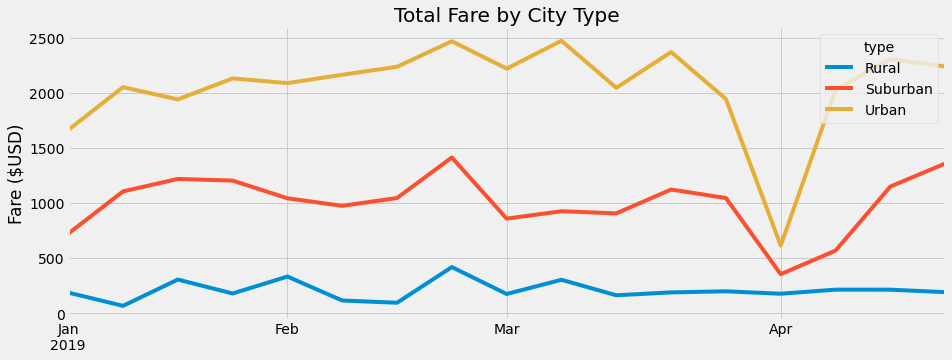

In [166]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
jan_to_apr_fares_per_week_df.plot.line(figsize = (14,5))
plt.ylabel("Fare ($USD)")
plt.xlabel("")
plt.title("Total Fare by City Type")

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Save figure.
plt.savefig("analysis/Total_Fare_by_City_Type.png")